In [ ]:
"""
User Behavior Classification Model | Python, Machine Learning

Author: Avoy Tejada

Description:
Classifies user behavior patterns based on device usage metrics.
Includes data preprocessing, feature engineering, model training,
and evaluation.
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset
data = pd.read_csv('user_behavior_dataset.csv')

# Display the first few rows to understand the structure
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
# Data Preprocessing
# Check for missing values
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [7]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Device Model'] = label_encoder.fit_transform(data['Device Model'])
data['Operating System'] = label_encoder.fit_transform(data['Operating System'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [17]:
# Normalizing numerical features
scaler = StandardScaler()
numerical_features = [
    'App Usage Time (min/day)', 
    'Screen On Time (hours/day)', 
    'Battery Drain (mAh/day)', 
    'Data Usage (MB/day)', 
    'Age'
]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [19]:
data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,0.688256,0.367626,0.423726,67,0.300405,0.126383,1,4
1,2,1,0,-0.017668,-0.186771,-0.237198,42,0.022277,0.709506,0,3
2,3,3,0,-0.661471,-0.415053,-0.933550,32,-0.949607,0.292989,1,2
3,4,0,0,-0.181443,-0.154160,0.184279,56,-0.091787,-1.539682,1,3
4,5,4,1,-0.475107,-0.317218,-0.193218,58,0.091028,-0.623346,0,3


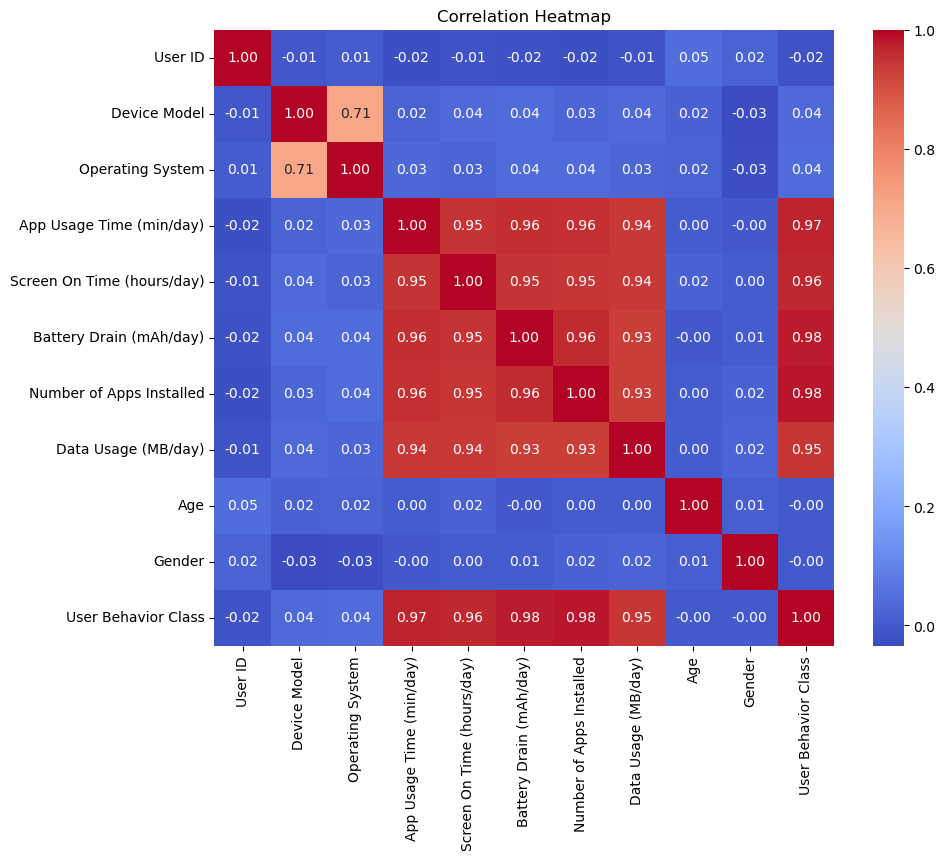

In [21]:
# Exploratory Data Analysis (EDA)
# 1. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\avoy1\AppData\Local\Temp\ipykernel_22084\2104877956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='User Behavior Class', data=data, palette='viridis')


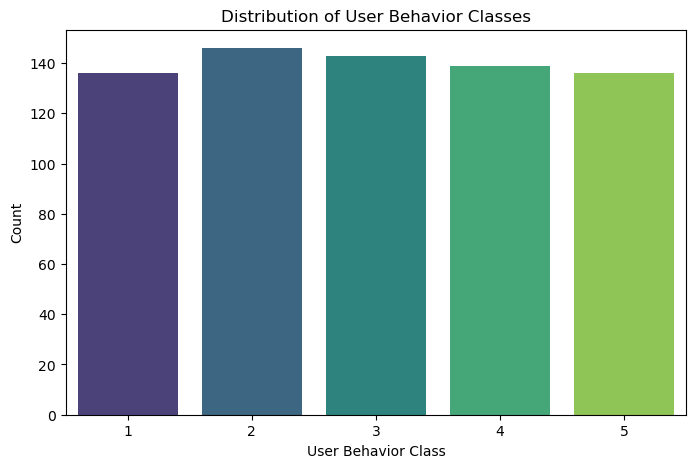

In [25]:
# 2. Distribution of User Behavior Classes
plt.figure(figsize=(8, 5))
sns.countplot(x='User Behavior Class', data=data, palette='viridis')
plt.title("Distribution of User Behavior Classes")
plt.xlabel("User Behavior Class")
plt.ylabel("Count")
plt.show()

C:\Users\avoy1\AppData\Local\Temp\ipykernel_22084\1515041717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=data, palette='viridis')


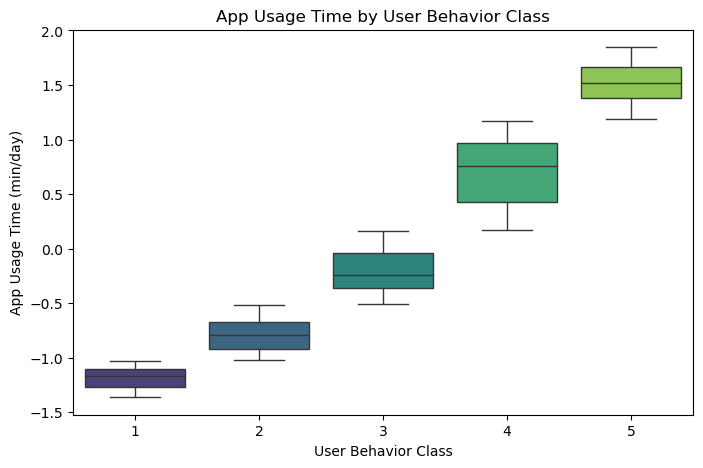

In [31]:
# 3. App Usage Time vs. User Behavior Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=data, palette='viridis')
plt.title("App Usage Time by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("App Usage Time (min/day)")
plt.show()


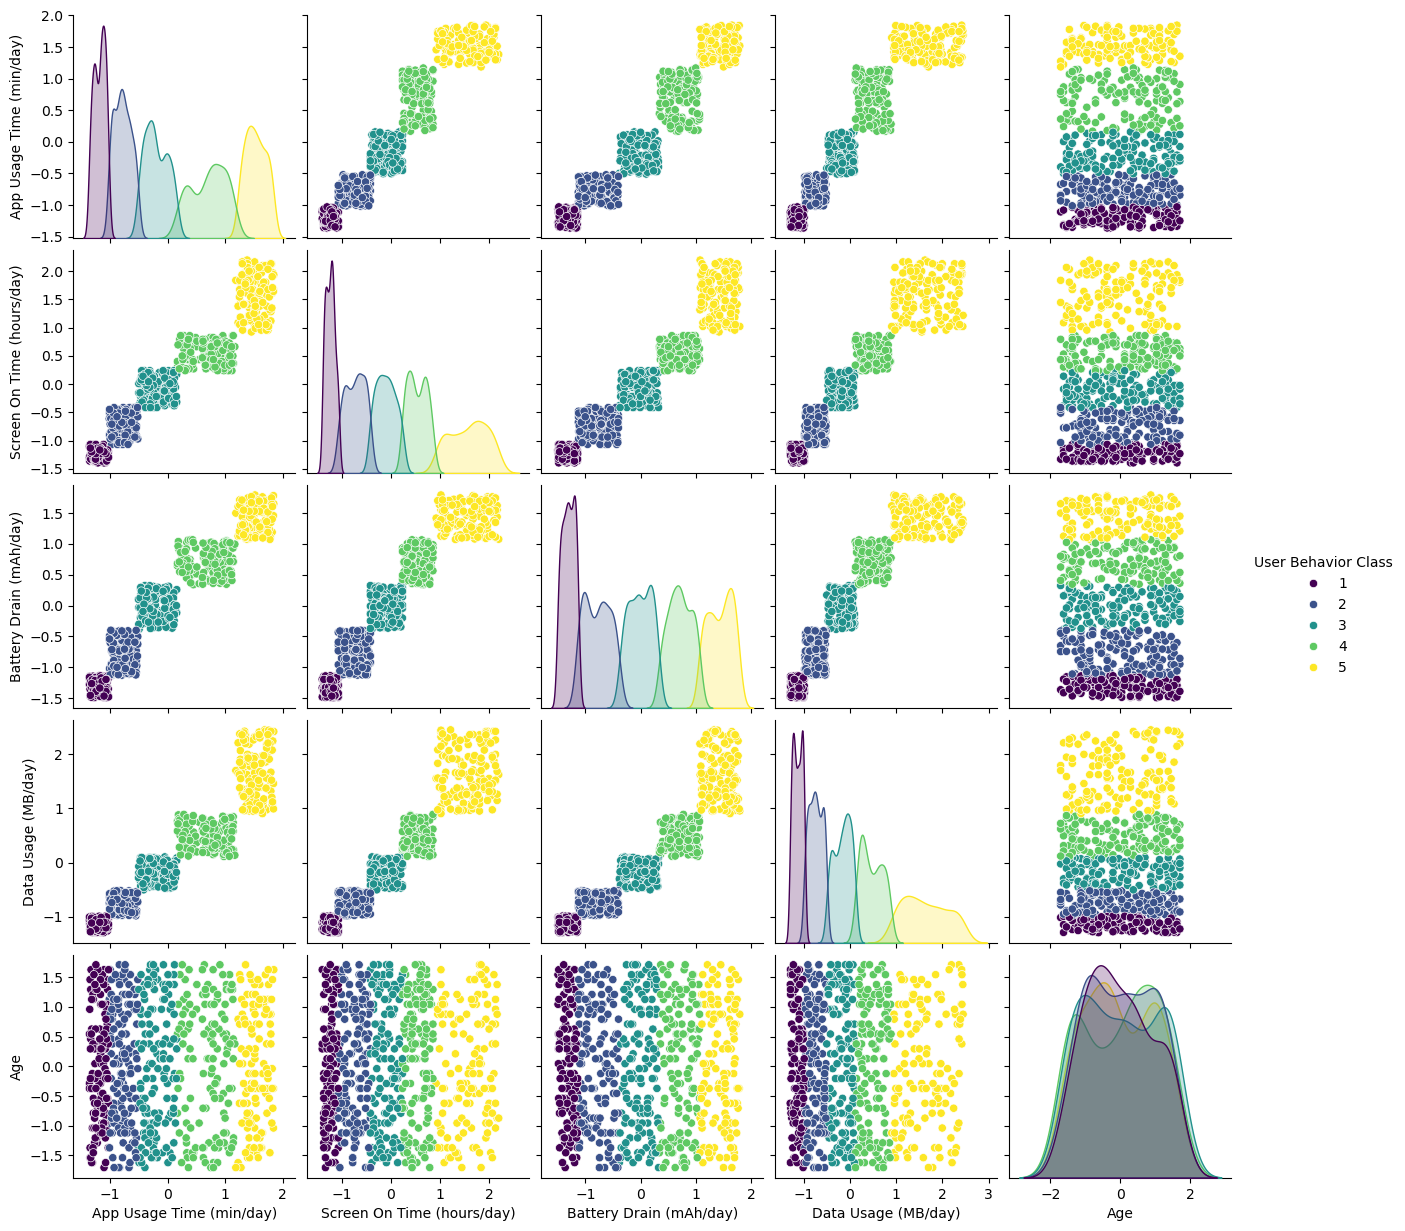

In [33]:
# 4. Pairplot to observe relationships
sns.pairplot(data, hue='User Behavior Class', vars=numerical_features, palette='viridis')
plt.show()

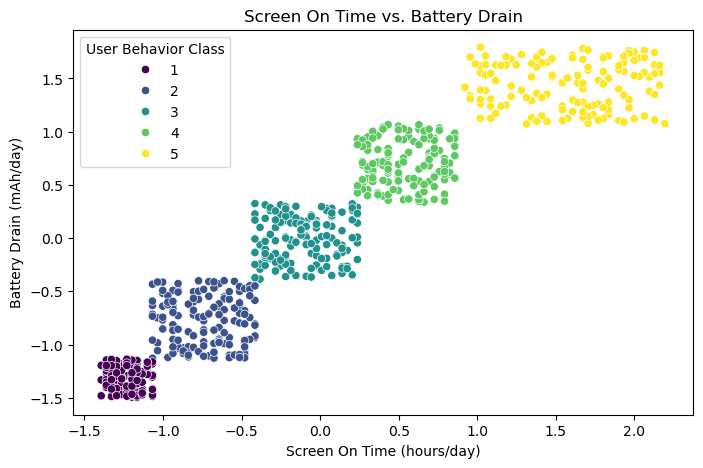

In [35]:
# 5. Screen On Time vs. Battery Drain (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', hue='User Behavior Class', data=data, palette='viridis')
plt.title("Screen On Time vs. Battery Drain")
plt.xlabel("Screen On Time (hours/day)")
plt.ylabel("Battery Drain (mAh/day)")
plt.legend(title="User Behavior Class")
plt.show()

In [37]:
# Model Training and Evaluation
# Splitting the dataset into training and testing sets
X = data.drop(['User ID', 'User Behavior Class'], axis=1)
y = data['User Behavior Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
# Predictions on the test set
y_pred = rf_model.predict(X_test)

In [43]:
# Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
Accuracy Score: 1.0


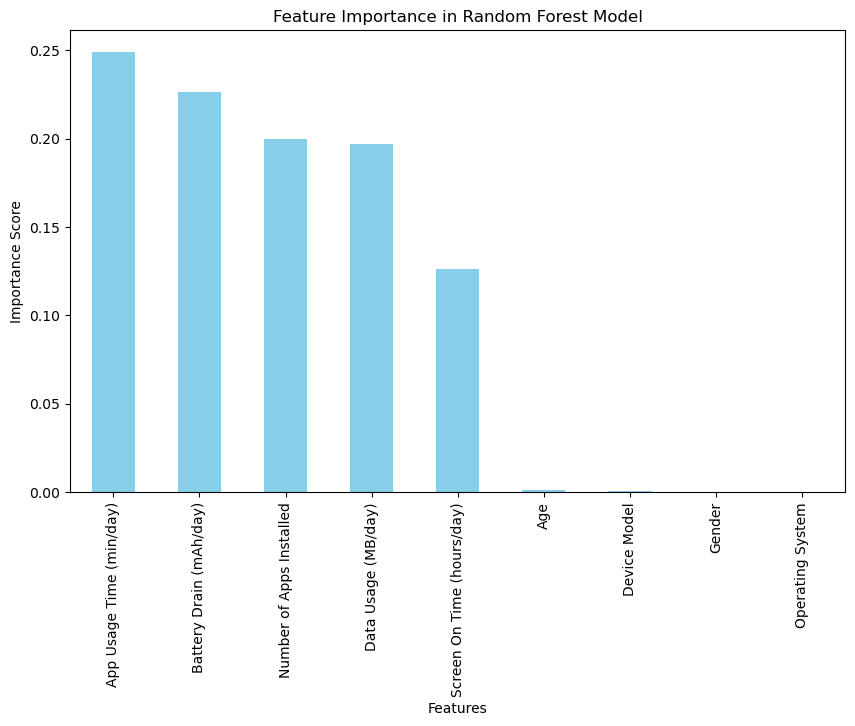

In [45]:
# Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance in Random Forest Model")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()


In [55]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [57]:
# Training and evaluating each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Model")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy)
    print("-" * 50)

Random Forest Model
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
Accuracy Score: 1.0
--------------------------------------------------
Decision Tree Model
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00  

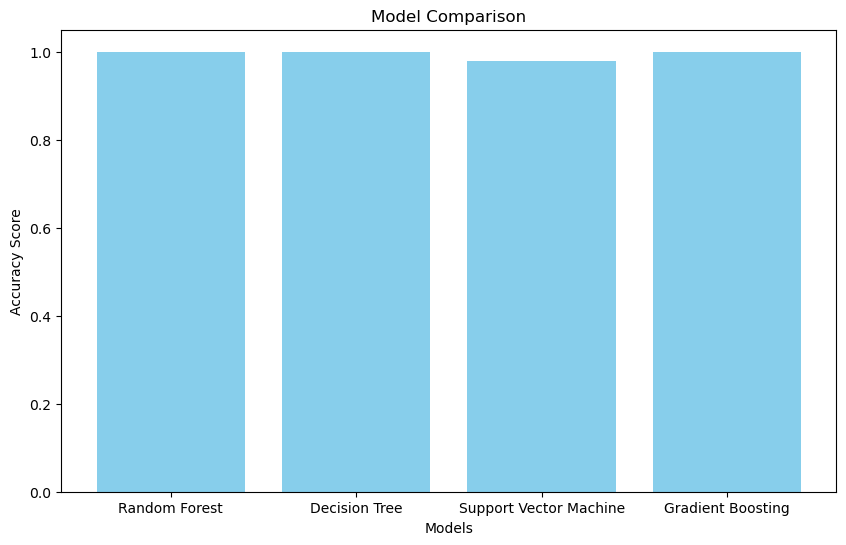

In [59]:
# Compare model performances
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.show()